# Loading your own code

You can run python code outside the notebook by typing

    %run path/to/python/file.py

In [2]:
%run ../src/notebook_init.py
%run ../src/features.py
%run ../src/target_encoding.py

%config InlineBackend.figure_format = 'retina'

# Installing more python libraries
If you want a python library that did not come with anaconda you can try:
    
    !pip install package_name


> Note: The more-transformers library is HIGHLY experimental. It is completely unstable and might have extremely serious bugs (I started writing it a few days ago and it's on version ~0.0.11). DO NOT use this library at client site unless it's at least version 0.1

In [5]:
#!pip install more-transformers
from more_transformers.common import ColumnSelector

# Data science loop is 
- Get the data
- Explore the data
- Prepare the data
- Train your model
- Score it

# Get the data

I wrote a get_features and a get_target function in the notebook_init.py file

In [6]:
X = get_features('train')
X_test = get_features('test')

y = get_target()

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NotApplicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,,,,0,2,2008,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NotApplicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,,,,0,5,2007,WD,Normal
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NotApplicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,,,,0,9,2008,WD,Normal
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NotApplicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,,,,0,2,2006,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NotApplicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,,,,0,12,2008,WD,Normal


# Explore the data

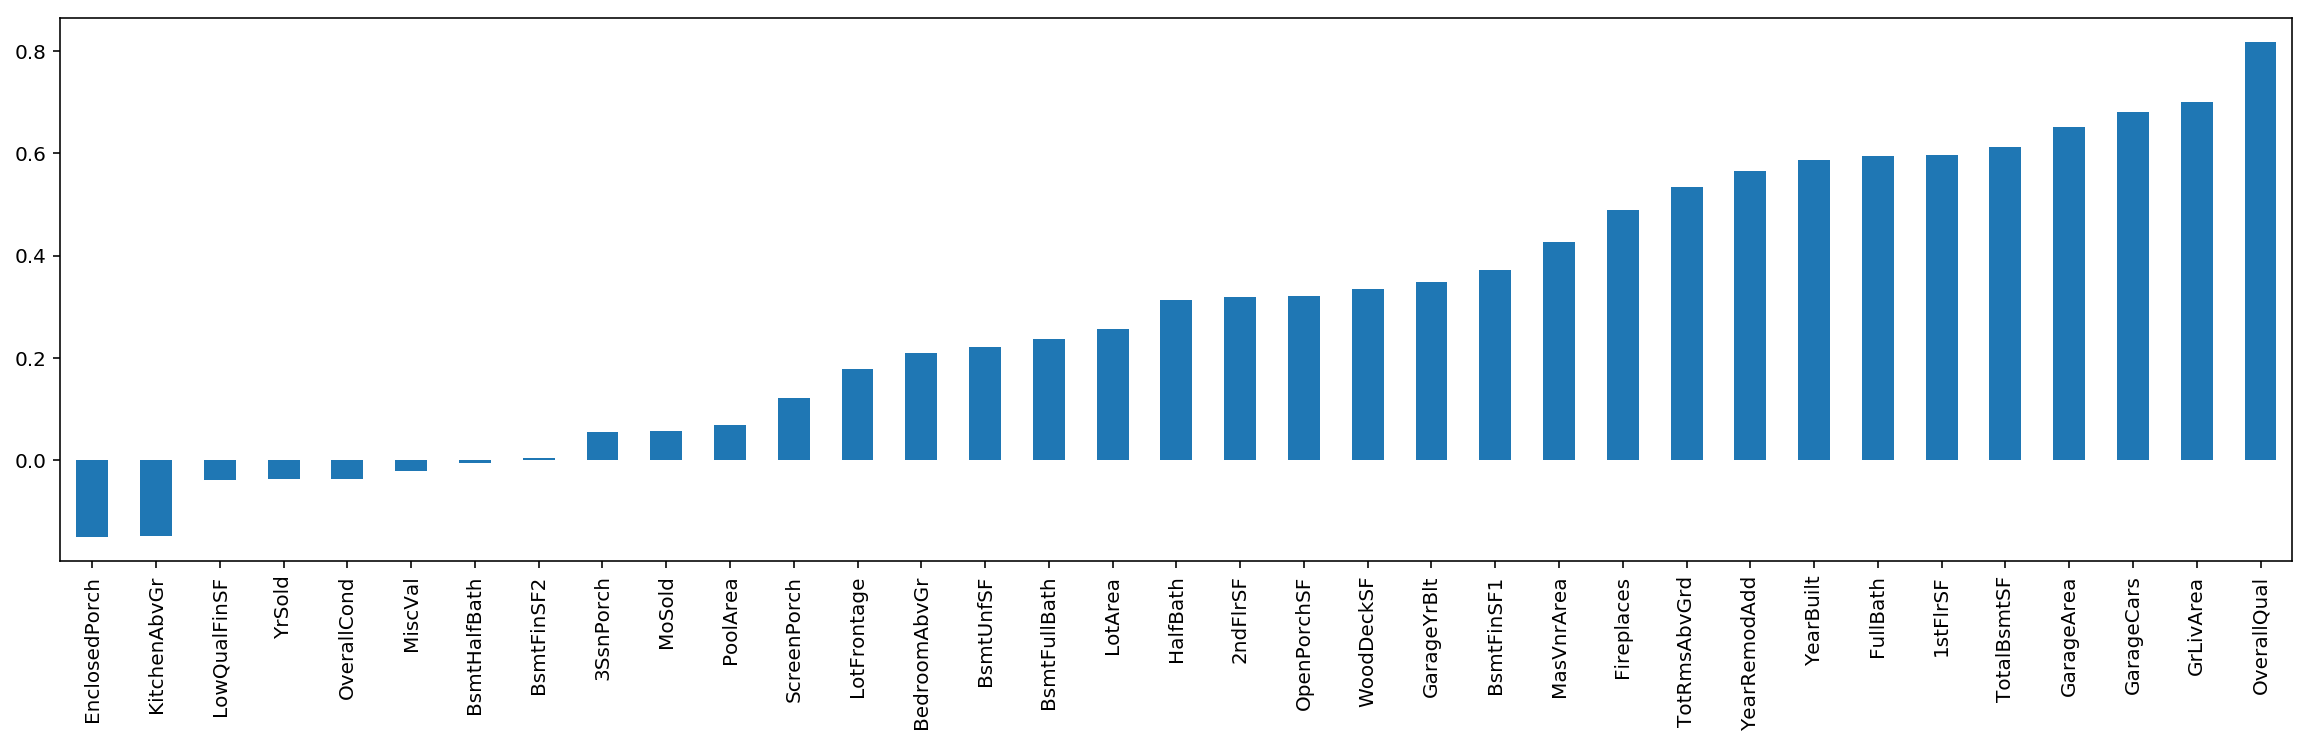

In [8]:
X.corrwith(y).sort_values().plot(kind='bar', figsize=(20,5))

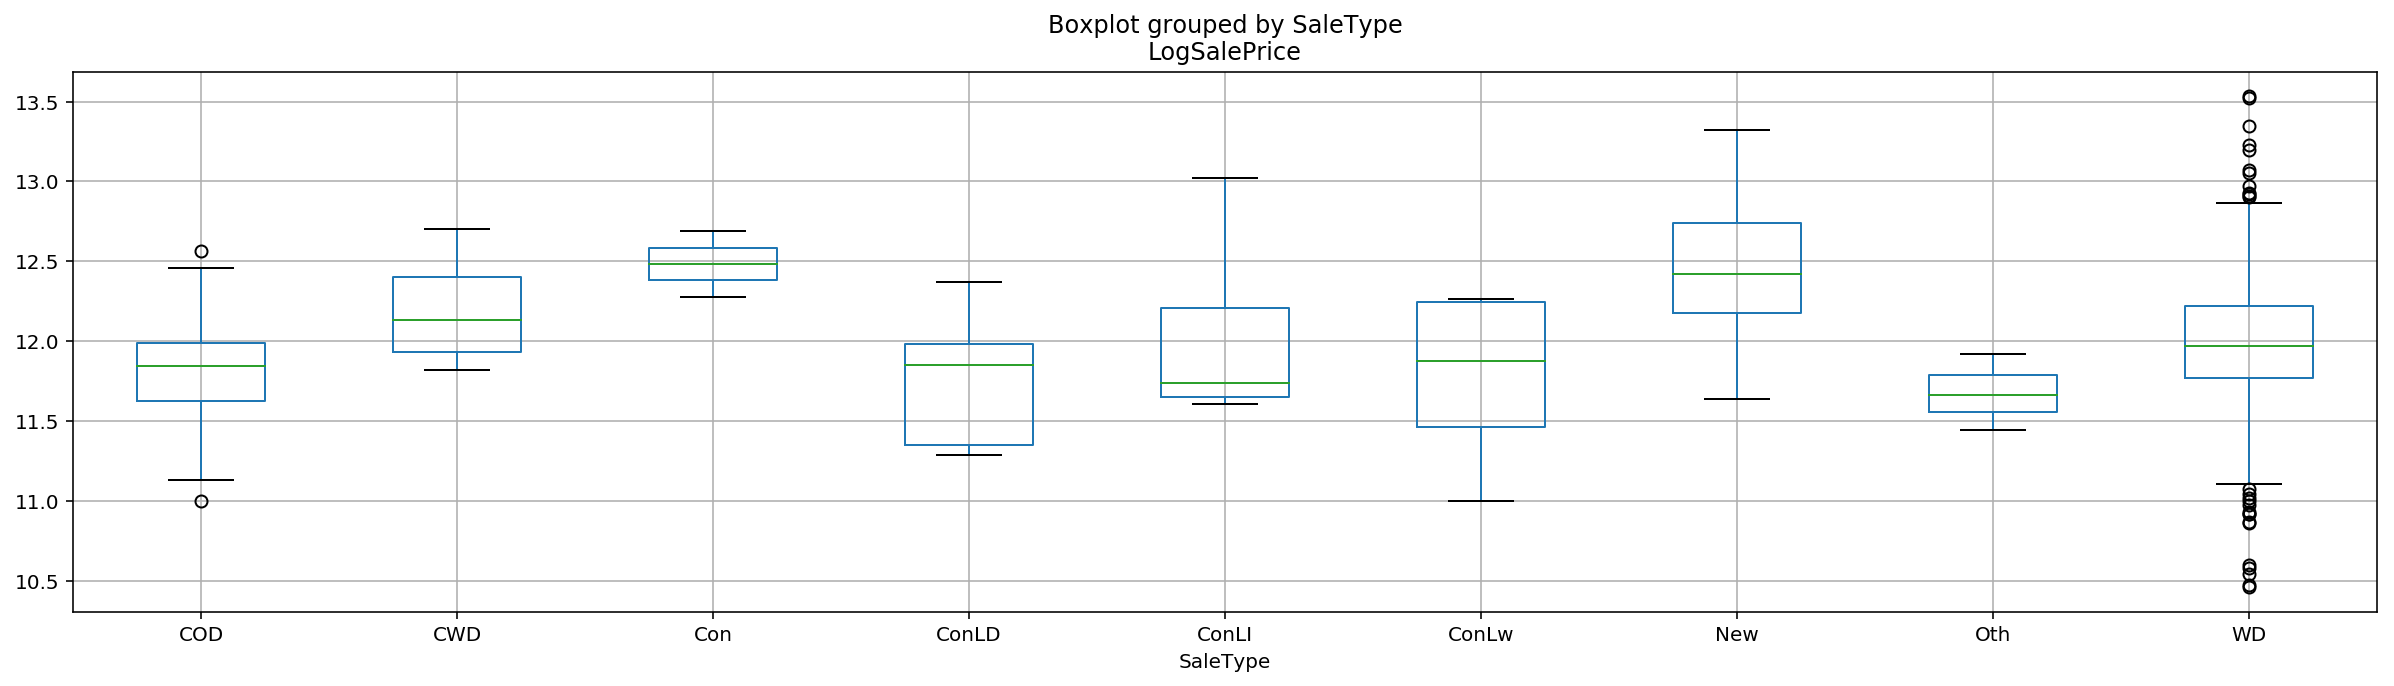

In [17]:
X.assign(LogSalePrice=y).boxplot('LogSalePrice', by='SaleType', figsize=(20,5))

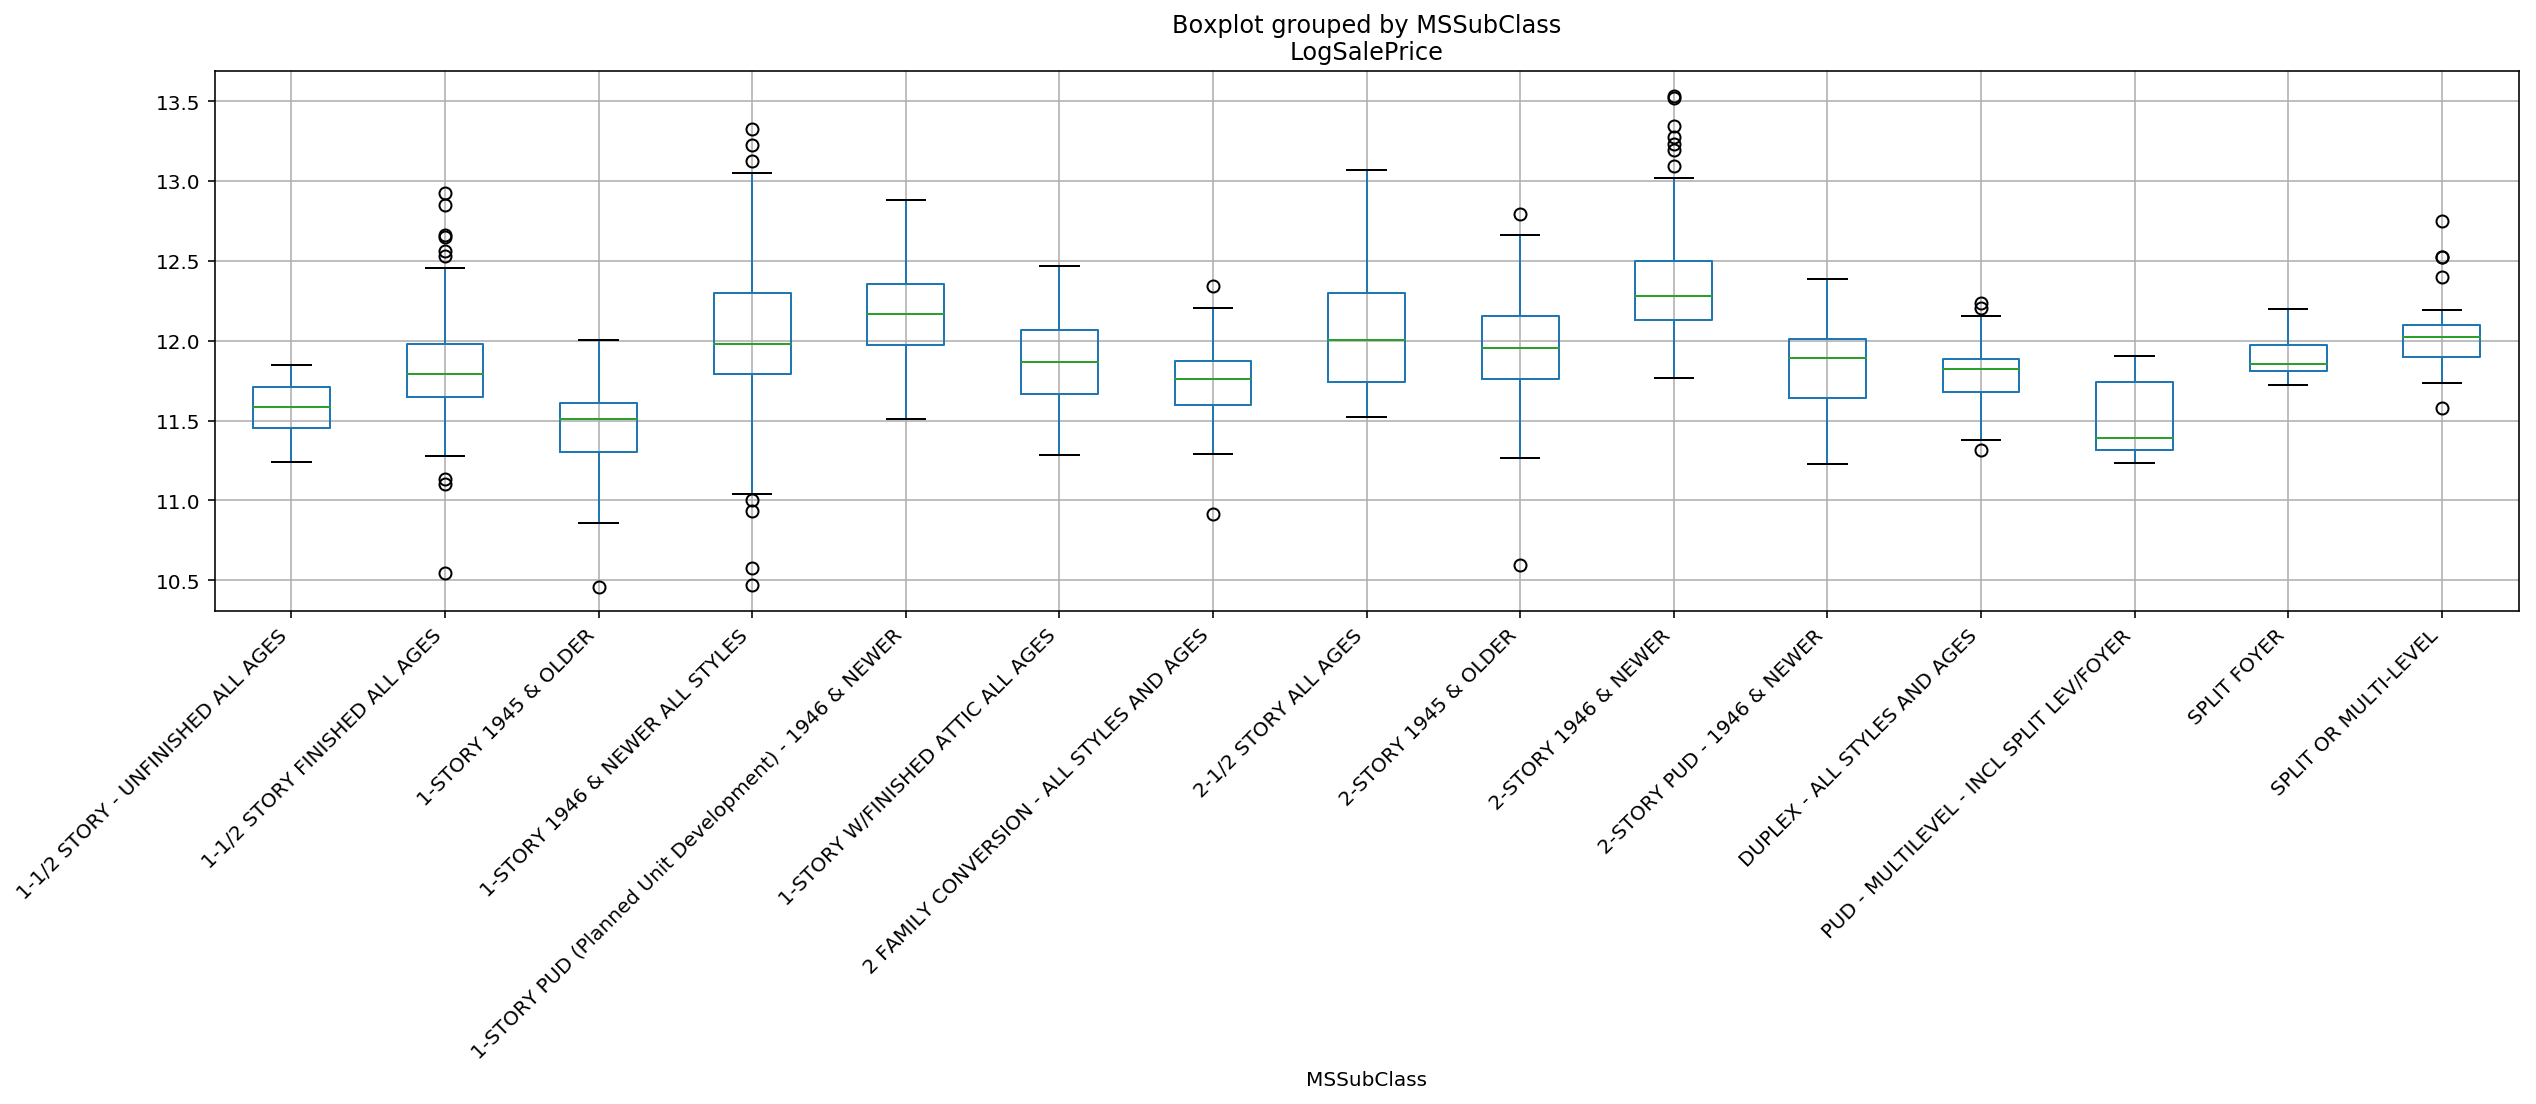

In [24]:
X.assign(LogSalePrice=y).boxplot('LogSalePrice', by='MSSubClass', figsize=(20,5))

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)

plt.show()

# Prepare data

In [26]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NotApplicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,,,,0,2,2008,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NotApplicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,,,,0,5,2007,WD,Normal
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NotApplicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,,,,0,9,2008,WD,Normal
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NotApplicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,,,,0,2,2006,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NotApplicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,,,,0,12,2008,WD,Normal


In [29]:
replace_values = {
    'ExterCond':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':-1, 'Po':-2},
    'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':-1, 'Po':-2},
    'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':-1, 'Po':-2},
}

X.replace(replace_values).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NotApplicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,1,0,PConc,1,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,,,,0,2,2008,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NotApplicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,0,0,CBlock,1,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,,,,0,5,2007,WD,Normal
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NotApplicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,1,0,PConc,1,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,,,,0,9,2008,WD,Normal
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NotApplicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,0,0,BrkTil,0,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,,,,0,2,2006,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NotApplicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,1,0,PConc,1,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,,,,0,12,2008,WD,Normal


# Model Development
- Select pre-processing
- Select algorithm
- Tune algorithm

In [50]:
from more_transformers.common import ApplyFunction, PandasMethod
from more_transformers.preprocessing import StandardScaler, GetDummies
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [55]:
linear_model = Pipeline([
    ('map_values', PandasMethod('replace', kwargs={'to_replace':replace_values})),
    ('fillna', PandasMethod('fillna', kwargs={'value':0})),
    ('get_dummies', GetDummies(drop_first=True)),
    ('column_selector', ColumnSelector('numeric')),
    ('scaling', StandardScaler()),
    ('linreg', ElasticNet())
])

### Optimize linear Model

In [92]:
param_grid = {
    'linreg__alpha':np.linspace(0, 1, 11), 
    'linreg__l1_ratio':np.linspace(0, 1, 11),
}

gs = GridSearchCV(linear_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gs.fit(X,y)
gs.best_params_

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:  1.1min finished


{'linreg__alpha': 0.1, 'linreg__l1_ratio': 0.1}

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.0,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183
0.1,0.588180,0.863684,0.841040,0.822319,0.808346,0.791820,0.773216,0.753524,0.734057,0.714296,0.692806
0.2,0.790329,0.840937,0.805509,0.769615,0.730662,0.687678,0.639867,0.590671,0.539616,0.482128,0.423530
0.3,0.834526,0.819039,0.764327,0.703055,0.631314,0.551329,0.466744,0.373875,0.290194,0.202926,0.100668
0.4,0.850614,0.798303,0.718444,0.622661,0.511145,0.389490,0.269647,0.156152,0.020538,-0.003468,-0.003468
0.5,0.857752,0.775413,0.665152,0.529223,0.375933,0.225458,0.083932,-0.003468,-0.003468,-0.003468,-0.003468
0.6,0.861117,0.749584,0.605636,0.428248,0.237300,0.077429,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468
0.7,0.862597,0.721681,0.540571,0.320343,0.124247,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468
0.8,0.863017,0.693373,0.470901,0.214649,0.014103,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468
0.9,0.862786,0.663880,0.399842,0.131378,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468,-0.003468


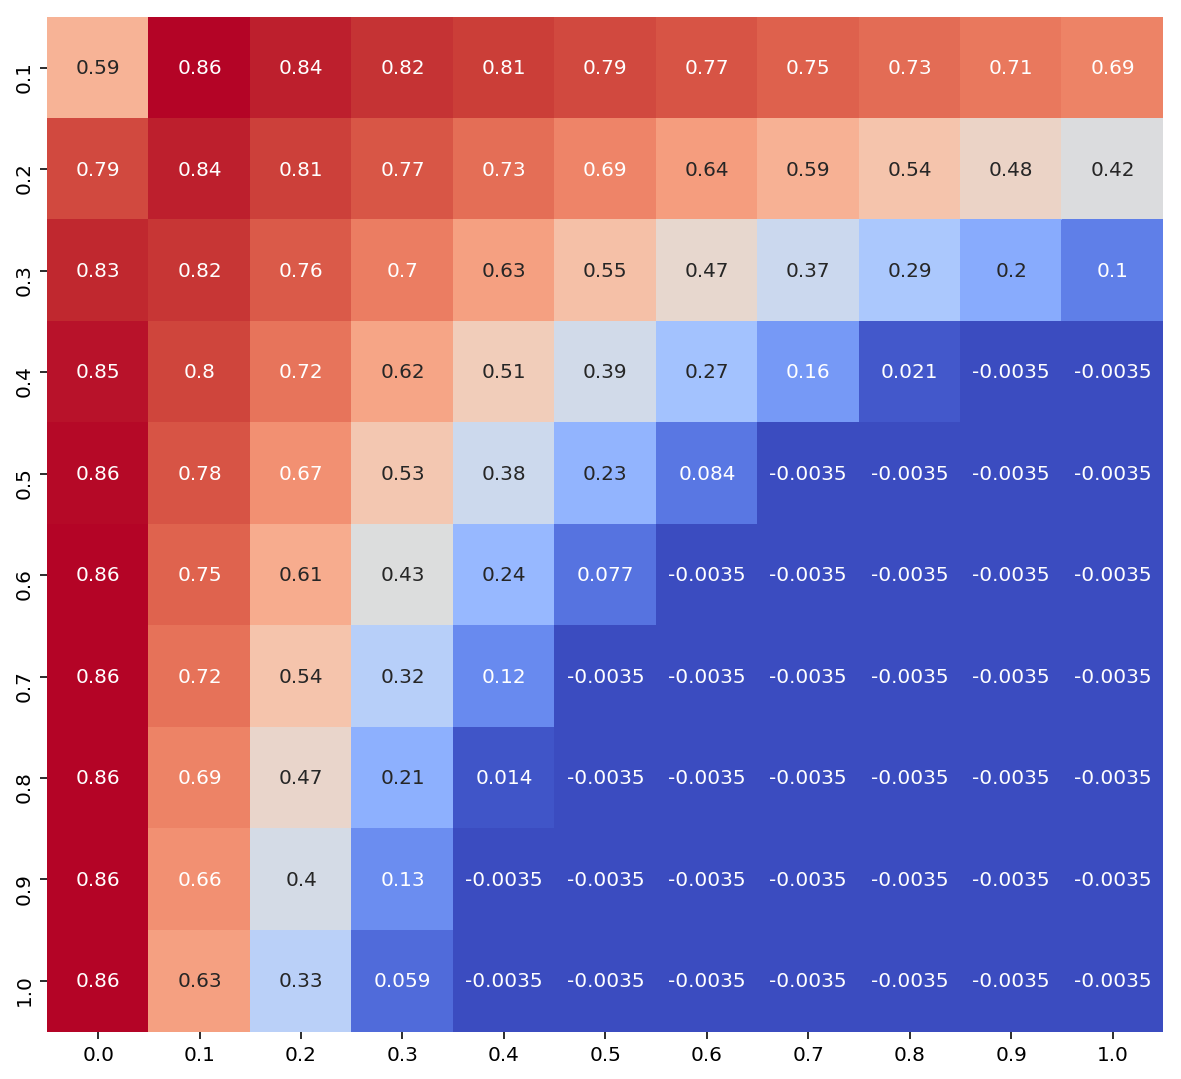

In [103]:
results = (pd.DataFrame(gs.cv_results_)
           .rename(columns={'param_linreg__alpha':'alpha','param_linreg__l1_ratio':'l1_ratio'})
           .pivot(index='alpha', columns='l1_ratio', values='mean_test_score')
          )

results.columns = [round(col,1) for col in results.columns]
results.index = [round(ix,1) for ix in results.index]
         
plt.figure(figsize=(10,10))
sns.heatmap(results.iloc[1:], cmap='coolwarm', annot=True, square=True, cbar=False)

display(results)

In [104]:
param_grid = {
    'linreg__alpha':np.linspace(0, 1, 11), 
    'linreg__l1_ratio':np.linspace(0, .2, 11),
}

gs = GridSearchCV(linear_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gs.fit(X,y)
gs.best_params_

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:  1.2min finished


{'linreg__alpha': 0.2, 'linreg__l1_ratio': 0.02}

,0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20
0.0,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183
0.1,0.588180,0.852461,0.872351,0.870650,0.867641,0.863684,0.858695,0.853738,0.849330,0.845216,0.841040
0.2,0.790329,0.872860,0.867868,0.859575,0.849804,0.840937,0.832819,0.825161,0.817804,0.811738,0.805509
0.3,0.834526,0.870494,0.859022,0.844347,0.831272,0.819039,0.808526,0.798666,0.787899,0.776245,0.764327
0.4,0.850614,0.866097,0.848232,0.829373,0.812458,0.798303,0.783649,0.767759,0.750790,0.734630,0.718444
0.5,0.857752,0.860854,0.836687,0.813897,0.794581,0.775413,0.754536,0.732739,0.711826,0.689540,0.665152
0.6,0.861117,0.854699,0.825308,0.798881,0.775284,0.749584,0.722799,0.696572,0.668269,0.637326,0.605636
0.7,0.862597,0.847988,0.813495,0.783589,0.753941,0.721681,0.690338,0.656462,0.619405,0.581095,0.540571
0.8,0.863017,0.840760,0.801450,0.767288,0.730822,0.693373,0.654990,0.612433,0.567801,0.520439,0.470901
0.9,0.862786,0.833331,0.789857,0.749879,0.706708,0.663880,0.616860,0.566098,0.512837,0.456372,0.399842


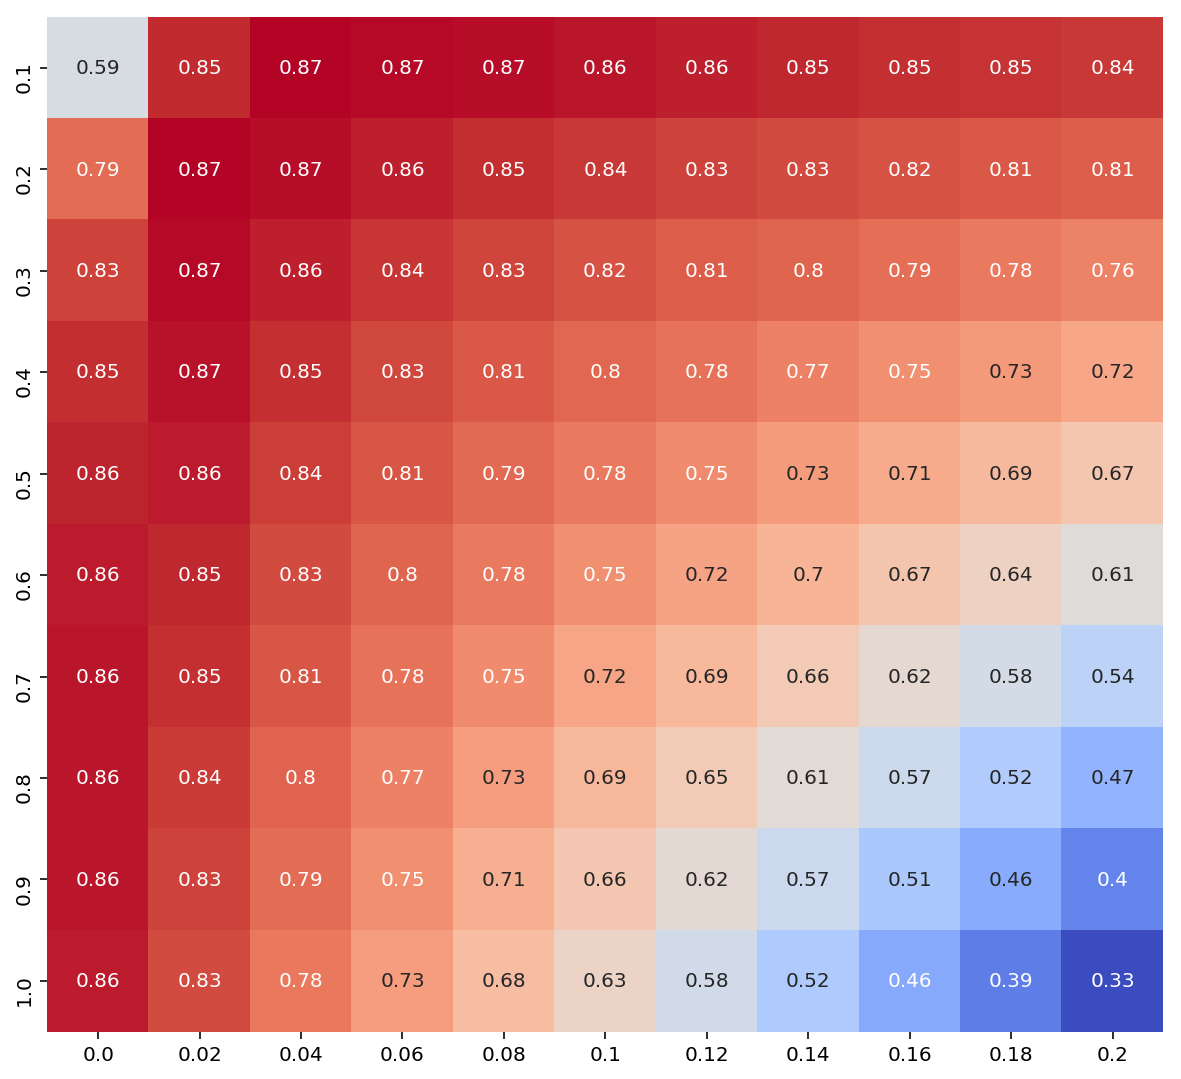

In [107]:
results = (pd.DataFrame(gs.cv_results_)
           .rename(columns={'param_linreg__alpha':'alpha','param_linreg__l1_ratio':'l1_ratio'})
           .pivot(index='alpha', columns='l1_ratio', values='mean_test_score')
          )

results.columns = [round(col,2) for col in results.columns]
results.index = [round(ix,2) for ix in results.index]
         
plt.figure(figsize=(10,10))
sns.heatmap(results.iloc[1:], cmap='coolwarm', annot=True, square=True, cbar=False)

display(results)

In [110]:
param_grid = {
    'linreg__alpha':np.linspace(0, .5, 11), 
    'linreg__l1_ratio':np.linspace(0, .1, 11),
}

gs = GridSearchCV(linear_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gs.fit(X,y)
gs.best_params_

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:  1.2min finished


{'linreg__alpha': 0.2, 'linreg__l1_ratio': 0.02}

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10
0.00,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183,-35.141183
0.05,-0.015731,0.344438,0.564481,0.726167,0.824646,0.856495,0.866478,0.870646,0.871402,0.871310,0.870926
0.10,0.588180,0.771359,0.852461,0.869330,0.872351,0.871708,0.870650,0.869374,0.867641,0.865811,0.863684
0.15,0.733220,0.847000,0.870595,0.872570,0.870907,0.868790,0.866187,0.863023,0.859395,0.855638,0.852061
0.20,0.790329,0.864737,0.872860,0.871031,0.867868,0.864181,0.859575,0.854655,0.849804,0.845110,0.840937
0.25,0.818587,0.870006,0.872037,0.868505,0.863951,0.858179,0.852148,0.845933,0.840404,0.835125,0.830128
0.30,0.834526,0.872105,0.870494,0.865521,0.859022,0.851787,0.844347,0.837555,0.831272,0.825193,0.819039
0.35,0.844293,0.872434,0.868464,0.861985,0.853654,0.845056,0.836800,0.829287,0.822001,0.814782,0.808541
0.40,0.850614,0.871834,0.866097,0.857922,0.848232,0.838298,0.829373,0.820811,0.812458,0.805188,0.798303
0.45,0.854852,0.870801,0.863592,0.853596,0.842498,0.831729,0.821804,0.812121,0.803607,0.795532,0.787320


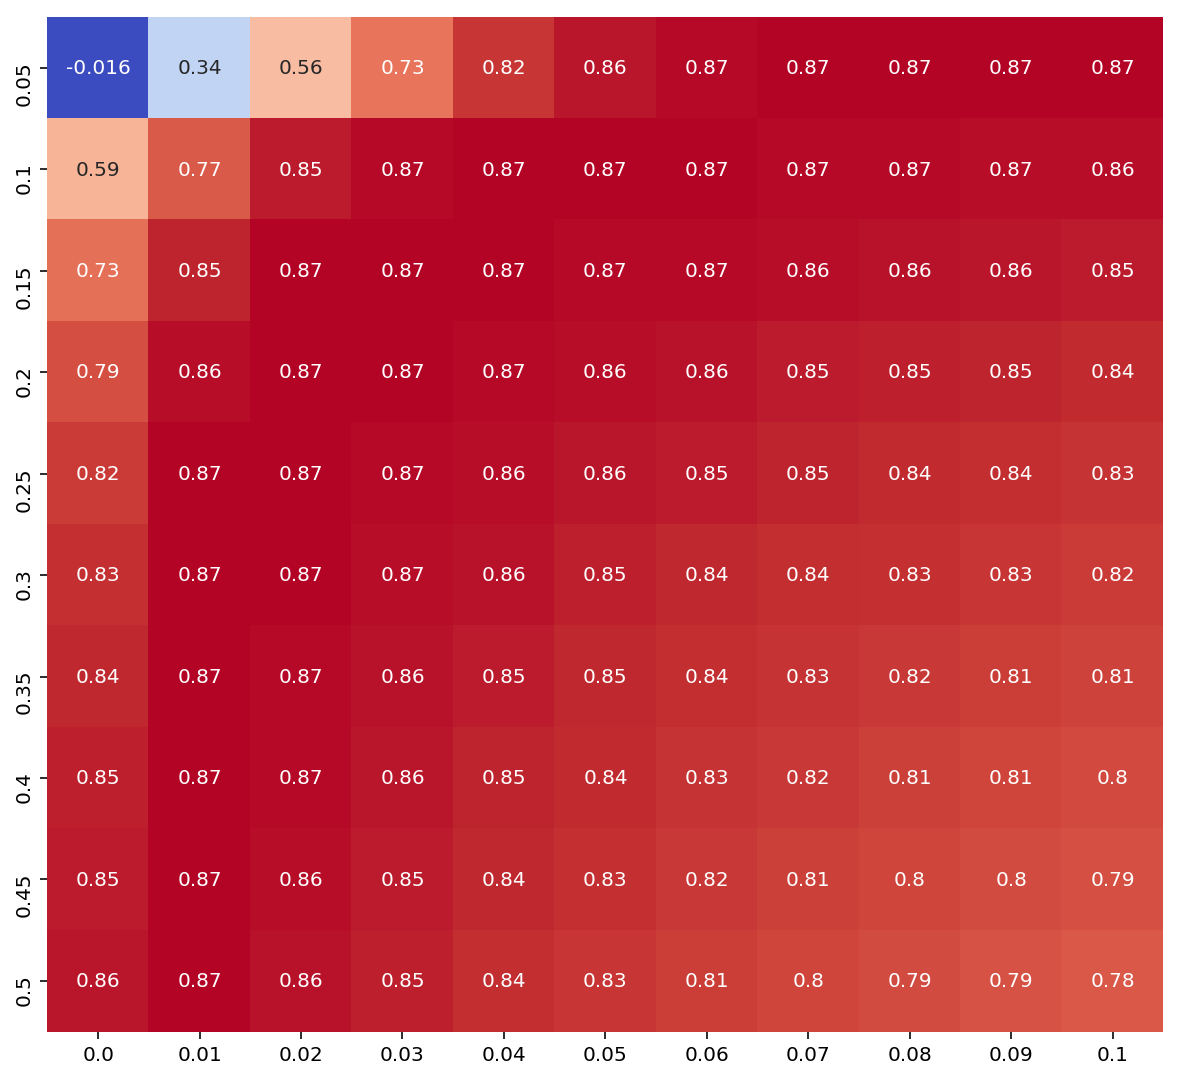

In [112]:
results = (pd.DataFrame(gs.cv_results_)
           .rename(columns={'param_linreg__alpha':'alpha','param_linreg__l1_ratio':'l1_ratio'})
           .pivot(index='alpha', columns='l1_ratio', values='mean_test_score')
          )

results.columns = [round(col,2) for col in results.columns]
results.index = [round(ix,2) for ix in results.index]
         
plt.figure(figsize=(10,10))
sns.heatmap(results.iloc[1:], cmap='coolwarm', annot=True, square=True, cbar=False)

display(results)

In [148]:
results = (pd.DataFrame(gs.cv_results_)
           .rename(columns={'param_linreg__alpha':'alpha','param_linreg__l1_ratio':'l1_ratio'})
           [['alpha','l1_ratio','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']]
           .loc[lambda x: x.filter(like='test_score').apply(lambda row: all(row > .8), axis=1)]
          )
vals = results.drop(columns=['l1_ratio']).set_index('alpha').T
vals

alpha,0.20,0.25,0.30,0.30,0.35,0.35,0.40,0.40,0.45,0.45,0.50,0.50
split0_test_score,0.880205,0.896883,0.822565,0.904437,0.840255,0.906616,0.852158,0.906731,0.860512,0.905288,0.866556,0.903663
split1_test_score,0.870360,0.874805,0.832530,0.875930,0.843296,0.875217,0.850131,0.873501,0.854613,0.871839,0.857602,0.869847
split2_test_score,0.875574,0.880408,0.831909,0.881246,0.845032,0.881430,0.853713,0.881141,0.859673,0.880534,0.863863,0.879639
split3_test_score,0.896270,0.894417,0.882909,0.893813,0.888369,0.892874,0.891047,0.891455,0.892167,0.889887,0.892367,0.888127
split4_test_score,0.801276,0.803518,0.802714,0.805096,0.804513,0.806034,0.806021,0.806343,0.807293,0.806454,0.808370,0.806367


In [152]:
vals.median().sort_values(ascending=False)

alpha
0.35    0.881430
0.30    0.881246
0.40    0.881141
0.45    0.880534
0.25    0.880408
0.50    0.879639
0.20    0.875574
0.50    0.863863
0.45    0.859673
0.40    0.852158
0.35    0.843296
0.30    0.831909
dtype: float64

In [158]:
best_linreg_model = linear_model.set_params(linreg__alpha=.35, linreg__l1_ratio=0.01, linreg__max_iter=5000)
cross_val_score(best_linreg_model, X, y)

array([0.90661595, 0.8752169 , 0.88142967, 0.89287405, 0.80603381])

# Chaining Linear Model with CatBoost

In [167]:
catboost_dict = dict(
    n_estimators=3500,
    cat_features=get_cat_features(X),
    metric_period=100,
    eval_metric='RMSE',
    learning_rate=0.05, 

)

#catboost_dict = dict(
#    n_estimators=1000,
#    cat_features=get_cat_features(X),
#    metric_period=100,
#    eval_metric='RMSE',
#    learning_rate=0.05, 
#)

In [168]:
model = ModelChainer([
    best_linreg_model, 
    CatBoostRegressor(**catboost_dict),
])

model.fit(X,y)

0:	learn: 0.1221233	total: 46.7ms	remaining: 2m 43s
100:	learn: 0.1059549	total: 2.59s	remaining: 1m 27s
200:	learn: 0.0943230	total: 19.6s	remaining: 5m 21s
300:	learn: 0.0860107	total: 24.3s	remaining: 4m 18s
400:	learn: 0.0787983	total: 27.8s	remaining: 3m 35s
500:	learn: 0.0724495	total: 32.5s	remaining: 3m 14s
600:	learn: 0.0669364	total: 36.1s	remaining: 2m 53s
700:	learn: 0.0618498	total: 39.3s	remaining: 2m 36s
800:	learn: 0.0570288	total: 42.3s	remaining: 2m 22s
900:	learn: 0.0532194	total: 47s	remaining: 2m 15s
1000:	learn: 0.0499654	total: 50.3s	remaining: 2m 5s
1100:	learn: 0.0469752	total: 54.4s	remaining: 1m 58s
1200:	learn: 0.0443107	total: 58.2s	remaining: 1m 51s
1300:	learn: 0.0421540	total: 1m 2s	remaining: 1m 45s
1400:	learn: 0.0397898	total: 1m 6s	remaining: 1m 39s
1500:	learn: 0.0374840	total: 1m 13s	remaining: 1m 37s
1600:	learn: 0.0353432	total: 1m 18s	remaining: 1m 33s
1700:	learn: 0.0333442	total: 1m 23s	remaining: 1m 28s
1800:	learn: 0.0317013	total: 1m 27s	re

In [169]:
y_pred = model.predict(X_test)

In [172]:
prepare_submission(y_pred, save=True, filename='answer.csv')

,Id,SalePrice
0,1461,118189.281384
1,1462,151687.300000
2,1463,179461.985266
3,1464,198815.029915
4,1465,198638.513363
...,...,...
1454,2915,85020.594229
1455,2916,88606.646437
1456,2917,164215.812126
1457,2918,118672.860168
